In [ ]:
import gym
from gym import spaces
import matplotlib.pyplot as plt
import numpy as np
from google.colab import widgets
import time
import random
import operator
from IPython.display import clear_output

In [ ]:
plot = np.zeros((4,4))
print(plot)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
class gridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.height = 4
        self.width = 4
        self.max_timesteps = 10
        self.actions = ['0', '1', '2', '3']
        
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3,2]
        self.pit1 = [2,2] 
        self.reward1 = [0,2]
        self.reward2 = [1,0]
        self.reward3 = [2,1]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        return observation
        
    def get_available_actions(self):
        return self.actions
    
    def step(self, action):
        a = np.random.random()

        if action == 0: 
            if (a<.901): 
                self.agent_pos[0] += 1
            elif(a>.901 and a<.95):
                self.agent_pos[0] -= 1
            else:
                self.agent_pos[1] += 1
       
        if action == 1: 
            if (a<.87):
                self.agent_pos[0] -= 1
            elif (a>=.87 and a<.97): 
                self.agent_pos[1] -=1
            else:
                self.agent_pos[0] += 1

        if action == 2:
            if (a<.91): 
                self.agent_pos[1] += 1
            elif (a>=.91 and a>.94): 
                self.agent_pos[1] += 2
            else:
                self.agent_pos[1] -= 1

        if action == 3: 
            if (a<.875):
                self.agent_pos[1] -= 1
            elif (a>=.875 and a<94): 
                 self.agent_pos[0] += 1
                 self.agent_pos[1] -= 1   
            else:
               self.agent_pos = [2,0] 

         
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        self.reward = 0

        if(self.agent_pos == self.goal_pos).all(): 
            self.reward +=10

        if(self.agent_pos == self.pit1).all(): 
            if (a<.3):
                self.reward -=3
            else:  
                self.reward -=5

        if(self.agent_pos == self.reward1).all():
            if (a<.45):
                self.reward +=2
            else:  
                self.reward +=3

        if(self.agent_pos == self.reward2).all():
            if (a<.7):
                self.reward +=2
            else:  
                self.reward +=4

        if(self.agent_pos == self.reward3).all():
            if (a<.5):
                self.reward +=1
            else:  
                self.reward +=6
  
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return observation, self.reward, done, info
    
    def check_state(self):
        if (self.agent_pos == self.pit1).all() : 
            return 'TERMINAL'
        elif (self.agent_pos == self.goal_pos).all() : 
            return 'TERMINAL'

    def render(self):
        plt.imshow(self.state)

In [ ]:
class Q_Agent():
    def __init__(self, env, epsilon=1.0, alpha=0.1, gamma=0.9):
        self.env = env
        epsilon_decay = []
        self.q_table = dict() 
        for x in range(env.height): 
            for y in range(env.width):
                self.q_table[(x,y)] =np.zeros(4) 

        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions):
        actions_available = [0,1,2,3]
        ran = np.random.random()
        if  ran > epsilon:
            action = np.argmax(self.q_table[tuple(env.agent_pos)])
        else:
            action = np.random.choice(actions_available)
        return action
    

In [ ]:
env = gridEnvironment()
agent = Q_Agent(env)

Streaming output truncated to the last 5000 lines.
Episode:  64
Reward:  188
Episode:  64
Reward:  190
Episode:  64
Reward:  192
Episode:  64
Reward:  196
Episode:  64
Reward:  198
Episode:  64
Reward:  200
Episode:  64
Reward:  200
Episode:  64
Reward:  200
Episode:  64
Reward:  204
Episode:  65
Reward:  2
Episode:  65
Reward:  4
Episode:  65
Reward:  6
Episode:  65
Reward:  8
Episode:  65
Reward:  10
Episode:  65
Reward:  12
Episode:  65
Reward:  14
Episode:  65
Reward:  18
Episode:  65
Reward:  20
Episode:  65
Reward:  24
Episode:  65
Reward:  26
Episode:  65
Reward:  28
Episode:  65
Reward:  28
Episode:  65
Reward:  28
Episode:  65
Reward:  30
Episode:  65
Reward:  30
Episode:  65
Reward:  32
Episode:  65
Reward:  34
Episode:  65
Reward:  36
Episode:  65
Reward:  36
Episode:  65
Reward:  40
Episode:  65
Reward:  44
Episode:  65
Reward:  48
Episode:  65
Reward:  52
Episode:  65
Reward:  54
Episode:  65
Reward:  56
Episode:  65
Reward:  58
Episode:  65
Reward:  60
Episode:  65
Reward

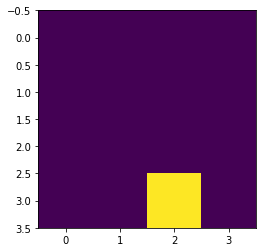

In [ ]:
obs = env.reset()
episode = 100
epsilon=1.0
decay_rate= (0.01) ** (1/episode)
reward_per_episode = []
epsilon_decay = []
render_break = 10

max_timesteps = 100
for timestep in range(1, 101):
    epsilon_decay.append(epsilon)
    render = True 
    done = False
    #reward = 0 
    step = 0
    game_over = False
    cumulative_reward = 0
    obs = env.reset()

    while step < max_timesteps and game_over != True:
        old_state = env.agent_pos.copy()
        action = agent.choose_action(env.actions) 
        observation, reward, done, info = env.step(action)
        agent.q_table[tuple(old_state)][action] = agent.q_table[tuple(old_state)][action] + agent.alpha * (reward + agent.gamma * np.max(agent.q_table[tuple(env.agent_pos)]) - agent.q_table[tuple(old_state)][action])
        cumulative_reward += reward
        step += 1
        if env.check_state() == 'TERMINAL':
          env.__init__()
          game_over = True
        if render:
          env.render()
          print("Episode: ", timestep)
          print("Reward: ", cumulative_reward)
           
    reward_per_episode.append(cumulative_reward)
    epsilon *= decay_rate

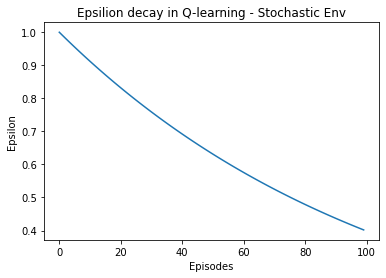

In [ ]:
plt.plot(epsilon_decay, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilion decay in Q-learning - Stochastic Env")
plt.show()

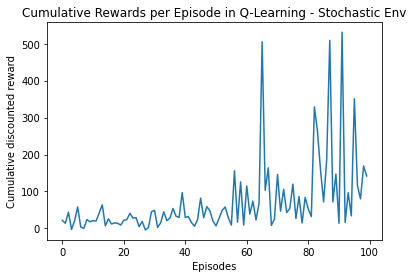

In [ ]:
plt.plot(reward_per_episode, label = "Rewards per episode")
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Cumulative Rewards per Episode in Q-Learning - Stochastic Env")
plt.show()

In [ ]:
env_sarsa = gridEnvironment()
s_agent = Q_Agent(env_sarsa)

Streaming output truncated to the last 5000 lines.
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75
Reward:  9
Episode:  75


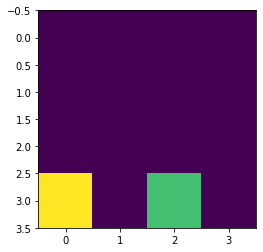

In [ ]:
obs_sarsa = env_sarsa.reset()
episode = 100
epsilon = 1.0
decay_rate= (0.01) ** (1/episode)
reward_per_episode_sarsa = []
epsilon_decay = []
render_break = 10

max_timesteps = 100
for timestep in range(1, 101):
    epsilon_decay.append(epsilon)
    render = True 
    done = False
    reward = 0 
    step = 0
    game_over = False
    cumulative_reward = 0
    obs_sarsa = env_sarsa.reset()

    while step < max_timesteps and game_over != True:
        old_state = env_sarsa.agent_pos.copy()
        old_action = s_agent.choose_action(env_sarsa.actions)
        action = agent.choose_action(env_sarsa.actions) 
        observation, reward, done, info = env_sarsa.step(action)
        s_agent.q_table[tuple(old_state)][action] = s_agent.q_table[tuple(old_state)][old_action] + s_agent.alpha * (reward + s_agent.gamma * (s_agent.q_table[tuple(env_sarsa.agent_pos)][action]) - s_agent.q_table[tuple(old_state)][old_action])
        old_action = action
        cumulative_reward += reward
        step += 1
        if env_sarsa.check_state() == 'TERMINAL': 
          env_sarsa.__init__()
          game_over = True
        if render:
          env_sarsa.render()
          print("Episode: ", timestep )
          print("Reward: ", cumulative_reward)

    reward_per_episode_sarsa.append(cumulative_reward)
    epsilon *= decay_rate

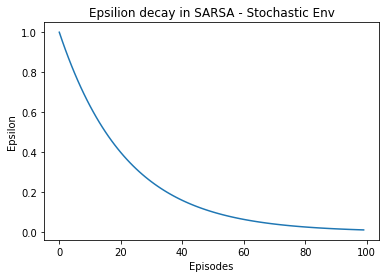

In [ ]:
plt.plot(epsilon_decay, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilion decay in SARSA - Stochastic Env")
plt.show()

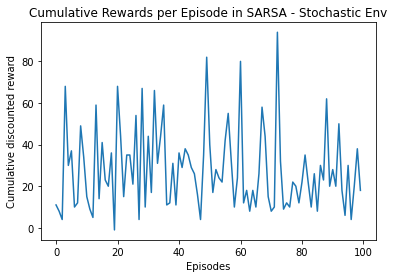

In [ ]:
plt.plot(reward_per_episode_sarsa, label = "Rewards per episode")
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Cumulative Rewards per Episode in SARSA - Stochastic Env")
plt.show()

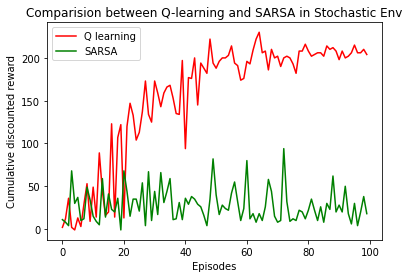

In [ ]:
plt.plot(reward_per_episode, color='r', label='Q learning')
plt.plot(reward_per_episode_sarsa, color='g', label='SARSA')
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Cumulative discounted reward")
plt.title("Comparision between Q-learning and SARSA in Stochastic Env")
plt.show()